## Loading Packages

In [1]:

import os, shutil

import pandas as pd
import numpy as np
import os


import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications import VGG16
from keras.callbacks import EarlyStopping

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.get_backend()
import plotly.graph_objects as go
import plotly.io as pio


In [2]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("No GPU installed - You are as slow as a High-End Windows PC")


Metal device set to: Default GPU Device:/device:GPU:0
Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2023-06-07 11:13:16.278529: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-07 11:13:16.279523: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-06-07 11:13:16.281823: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-07 11:13:16.281843: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Data Preparation

In [3]:
new_folders = False

# Odrner für die Originaldaten
original_dataset_dir = 'dataset/original_data'

# Ordner für die Trainings, Validierungs und Testdaten
base_dir = 'dataset/dataset'
#os.mkdir(base_dir)

#creates train-, validation- and test-folder
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

# creates a cat and a dog folder in the train folder
train_y_dir = os.path.join(train_dir, 'y')
#os.mkdir(train_y_dir)
train_n_dir = os.path.join(train_dir, 'n')
#os.mkdir(train_n_dir)

# creates a cat and a dog folder in the validation folder
validation_y_dir = os.path.join(validation_dir, 'y')
#os.mkdir(validation_y_dir)
validation_n_dir = os.path.join(validation_dir, 'n')
#os.mkdir(validation_n_dir)

# creates a cat and a dog folder in the test folder
test_y_dir = os.path.join(test_dir, 'y')
#os.mkdir(test_y_dir)
test_n_dir = os.path.join(test_dir, 'n')
#os.mkdir(test_n_dir)

if new_folders == True:
    os.mkdir(base_dir)
    os.mkdir(train_dir)
    os.mkdir(validation_dir)
    os.mkdir(test_dir)
    os.mkdir(train_y_dir)
    os.mkdir(train_n_dir)
    os.mkdir(validation_y_dir)
    os.mkdir(validation_n_dir)
    os.mkdir(test_y_dir)
    os.mkdir(test_n_dir)

total y images: 2498
total n images: 2897


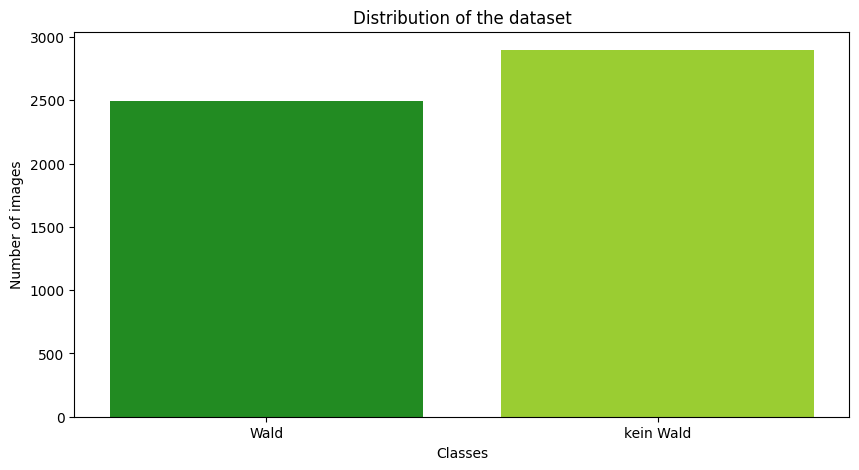

In [4]:
# read size of the dataset folders

print('total y images:', len(os.listdir('dataset/original_data/y')))
print('total n images:', len(os.listdir('dataset/original_data/n')))

# plot distribution of the dataset with matplotlib
plt.figure(figsize=(10, 5))
plt.bar(['Wald', 'kein Wald'], [len(os.listdir('dataset/original_data/y')), len(os.listdir('dataset/original_data/n'))],color = ['forestgreen', 'yellowgreen'])
plt.title('Distribution of the dataset')
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.savefig('Plots/dataset_distribution.png')
plt.show()



In [5]:
# calculates the number of images for train, validation and test
train_size = 0.6
validation_size = 0.2
test_size = 0.2

# calculates the number of images for train, validation and test
train_y_size = int(len(os.listdir('dataset/original_data/y')) * train_size)
train_n_size = int(len(os.listdir('dataset/original_data/n')) * train_size)

validation_y_size = int(len(os.listdir('dataset/original_data/y')) * validation_size)
validation_n_size = int(len(os.listdir('dataset/original_data/n')) * validation_size)

test_y_size = int(len(os.listdir('dataset/original_data/y')) * test_size)
test_n_size = int(len(os.listdir('dataset/original_data/n')) * test_size)

train_y_size + validation_y_size + test_y_size

2496

In [6]:
rename = False
y_dir = 'dataset/original_data/y/'
n_dir = 'dataset/original_data/n/'
if rename == True:
    # change name of the images in the dataset folder

    i = 0
    for filename in os.listdir(y_dir):
        os.rename(y_dir + filename, y_dir + 'y.' + str(i) + '.jpg')
        i = i + 1

    y = 0
    for filename in os.listdir(n_dir):
        os.rename(n_dir + filename, n_dir + 'n.' + str(y) + '.jpg')
        y = y + 1
        

    # copy train_y_size images from the original dataset to the train_y_dir
    fnames = ['y.{}.jpg'.format(i) for i in range(train_y_size)]
    for fname in fnames:
        src = os.path.join(y_dir, fname)
        dst = os.path.join(train_y_dir, fname)
        shutil.copyfile(src, dst)

    # copy train_n_size images from the original dataset to the train_n_dir
    fnames = ['n.{}.jpg'.format(i) for i in range(train_n_size)]
    for fname in fnames:
        src = os.path.join(n_dir, fname)
        dst = os.path.join(train_n_dir, fname)
        shutil.copyfile(src, dst)

    # copy validation_y_size images from the original dataset to the validation_y_dir
    fnames = ['y.{}.jpg'.format(i) for i in range(train_y_size, train_y_size + validation_y_size)]
    for fname in fnames:
        src = os.path.join(y_dir, fname)
        dst = os.path.join(validation_y_dir, fname)
        shutil.copyfile(src, dst)

    # copy validation_n_size images from the original dataset to the validation_n_dir
    fnames = ['n.{}.jpg'.format(i) for i in range(train_n_size, train_n_size + validation_n_size)]
    for fname in fnames:
        src = os.path.join(n_dir, fname)
        dst = os.path.join(validation_n_dir, fname)
        shutil.copyfile(src, dst)

    # copy test_y_size images from the original dataset to the test_y_dir
    fnames = ['y.{}.jpg'.format(i) for i in range(train_y_size + validation_y_size, train_y_size + validation_y_size + test_y_size)]
    for fname in fnames:
        src = os.path.join(y_dir, fname)
        dst = os.path.join(test_y_dir, fname)
        shutil.copyfile(src, dst)

    # copy test_n_size images from the original dataset to the test_n_dir
    fnames = ['n.{}.jpg'.format(i) for i in range(train_n_size + validation_n_size, train_n_size + validation_n_size + test_n_size)]
    for fname in fnames:
        src = os.path.join(n_dir, fname)
        dst = os.path.join(test_n_dir, fname)
        shutil.copyfile(src, dst)
    

## Control of the data

In [7]:
print('total training y images:', len(os.listdir(train_y_dir)))
print('total training n images:', len(os.listdir(train_n_dir)))
print('total validation y images:', len(os.listdir(validation_y_dir)))
print('total validation n images:', len(os.listdir(validation_n_dir)))
print('total test y images:', len(os.listdir(test_y_dir)))
print('total test n images:', len(os.listdir(test_n_dir)))

total training y images: 1498
total training n images: 1738
total validation y images: 499
total validation n images: 579
total test y images: 499
total test n images: 579


## Data Gathering with Generator


In [9]:
# without Data Augmentation

train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                             rotation_range=40,
                                                             width_shift_range=0.3,
                                                             height_shift_range=0.3,
                                                             shear_range=0.3,
                                                             zoom_range=0.3,
                                                             horizontal_flip=True,
                                                             fill_mode='nearest'
                                                             )

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (125, 125),
    batch_size = 16,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (125,125),
    batch_size = 16,
    class_mode = 'binary'
)

Found 2304 images belonging to 2 classes.
Found 768 images belonging to 2 classes.


Look at the output of one of these generators.

In [10]:

for data_batch, labels_batch in train_generator:
    print('data_batch shape:', data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    break


data_batch shape: (16, 125, 125, 3)
labels batch shape (16,)


## Modeling
Nun sollen Sie ein Modell für diese Daten bauen.

### Base Model

In [11]:
early_stopping = EarlyStopping(monitor='acc', patience=10, verbose=1, mode='auto', restore_best_weights=True)

In [10]:
base_model = keras.models.Sequential()

# 1st Convolutional Layer
base_model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(125,125,3)))
base_model.add(keras.layers.Dropout(0.3))

# 2nd Convolutional Layer
base_model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
base_model.add(keras.layers.Dropout(0.3))
base_model.add(keras.layers.MaxPooling2D((2,2)))

# Dense Layer
base_model.add(tf.keras.layers.Flatten())
base_model.add(keras.layers.Dense(256, activation='relu'))

# Output Layer
base_model.add(keras.layers.Dense(1, activation='sigmoid'))
base_model.summary()



2023-06-01 14:47:44.416414: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-01 14:47:44.416442: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 123, 123, 32)      896       
                                                                 
 dropout (Dropout)           (None, 123, 123, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 121, 121, 64)      18496     
                                                                 
 dropout_1 (Dropout)         (None, 121, 121, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 230400)            0         
                                                        

In [11]:
# Compile the model
base_model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=1e-3), metrics=['acc'])

# Train the model
history = base_model.fit(
    train_generator,
    steps_per_epoch=32,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=32
)


Epoch 1/30


2023-06-01 14:49:06.707184: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-06-01 14:49:07.056510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - ETA: 0s - loss: 8.4343 - acc: 0.6367

2023-06-01 14:49:34.724420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 55s 2s/step - loss: 8.4343 - acc: 0.6367 - val_loss: 0.6941 - val_acc: 0.3262
Epoch 2/30
32/32 [==============================] - 50s 2s/step - loss: 0.5607 - acc: 0.7812 - val_loss: 0.6633 - val_acc: 0.3438
Epoch 3/30
32/32 [==============================] - 48s 2s/step - loss: 0.4767 - acc: 0.7969 - val_loss: 0.6573 - val_acc: 0.6445
Epoch 4/30
32/32 [==============================] - 48s 2s/step - loss: 0.5634 - acc: 0.7949 - val_loss: 0.6485 - val_acc: 0.6914
Epoch 5/30
32/32 [==============================] - 47s 1s/step - loss: 0.4355 - acc: 0.8555 - val_loss: 0.6170 - val_acc: 0.7129
Epoch 6/30
32/32 [==============================] - 47s 1s/step - loss: 0.4686 - acc: 0.8301 - val_loss: 0.3901 - val_acc: 0.9004
Epoch 7/30
32/32 [==============================] - 46s 1s/step - loss: 0.3576 - acc: 0.8633 - val_loss: 0.6171 - val_acc: 0.6113
Epoch 8/30
32/32 [==============================] - 47s 1s/step - loss: 0.3041 - acc: 0.8770 - val_lo

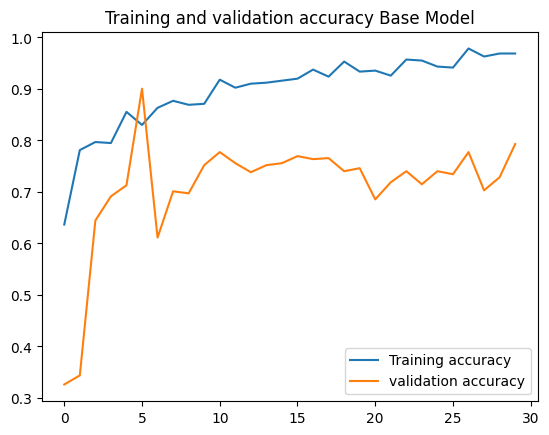

<Figure size 640x480 with 0 Axes>

In [18]:
# Plot of the training and validation Accuracy

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy', color='forestgreen')
plt.plot(epochs, val_acc, label='validation accuracy', color='yellowgreen')
plt.title('Training and validation accuracy Base Model')
plt.legend(loc=0)
plt.savefig('Plots/Base_Model/BaseModel_Accuracy.png')
plt.figure()

# create a folder with Plots for the base model
#os.mkdir('Plots')
#os.mkdir('Plots/Base_Model')




### Test the model (on the test data)

In [38]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (125,125),
    batch_size = 32,
    class_mode = 'binary')

test_loss, test_acc = base_model.evaluate(test_generator)
print('test acc:', test_acc)

Found 768 images belonging to 2 classes.
24/24 [==============================] - 34s 1s/step - loss: 0.5734 - acc: 0.7604
test acc: 0.7604166865348816


#### Predictions with the base model

In [48]:
# make predictions
y_pred = base_model.predict(test_generator)
y_pred

24/24 [==============================] - 35s 1s/step


array([[0.0314206 ],
       [0.5396252 ],
       [0.89626825],
       [0.38809565],
       [0.07475367],
       [0.35144603],
       [0.9531391 ],
       [0.87622833],
       [0.5014993 ],
       [0.9983296 ],
       [0.16120934],
       [0.8965633 ],
       [0.19202575],
       [0.3849668 ],
       [0.64975363],
       [0.72294086],
       [0.42892167],
       [0.62880903],
       [0.8814443 ],
       [0.9978461 ],
       [0.9124723 ],
       [0.8310024 ],
       [0.5105172 ],
       [0.71559566],
       [0.46399215],
       [0.94726807],
       [0.8164645 ],
       [0.99707735],
       [0.7694887 ],
       [0.8972368 ],
       [0.59526455],
       [0.20136772],
       [0.97311836],
       [0.54313284],
       [0.38598564],
       [0.46404675],
       [0.2473233 ],
       [0.42325264],
       [0.856597  ],
       [0.36302   ],
       [0.9422709 ],
       [0.8313746 ],
       [0.28178126],
       [0.33132747],
       [0.13986887],
       [0.5635942 ],
       [0.04332904],
       [0.996

In [40]:
y_pred = np.round(y_pred)



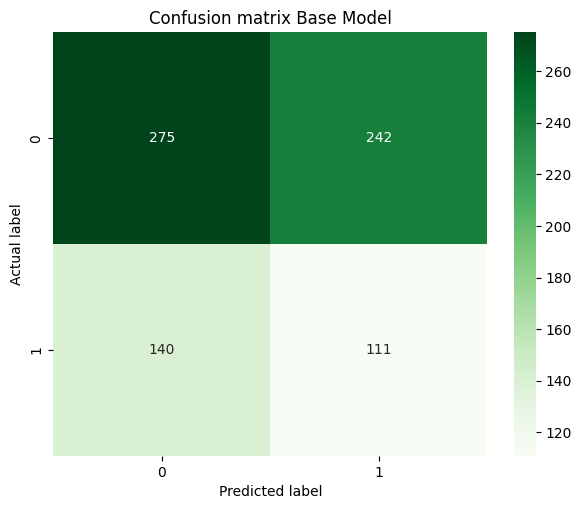

In [41]:
#plot confusion matrix for test data
cm = confusion_matrix(test_generator.classes, y_pred)

# plot the confusion matrix
plt.figure(figsize=(7,5.5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Greens')
plt.title('Confusion matrix Base Model')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


Found 768 images belonging to 2 classes.
48/48 [==============================] - 35s 720ms/step - loss: 0.7887 - acc: 0.7122
test acc: 0.7122396230697632


2023-05-31 15:25:04.131763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


48/48 [==============================] - 34s 705ms/step
48/48 - 35s - loss: 0.7887 - acc: 0.7122 - 35s/epoch - 719ms/step

Test accuracy: 0.788690984249115

Test loss: 0.7122396230697632
              precision    recall  f1-score   support

           0       0.65      0.39      0.49       517
           1       0.31      0.57      0.40       251

    accuracy                           0.45       768
   macro avg       0.48      0.48      0.45       768
weighted avg       0.54      0.45      0.46       768



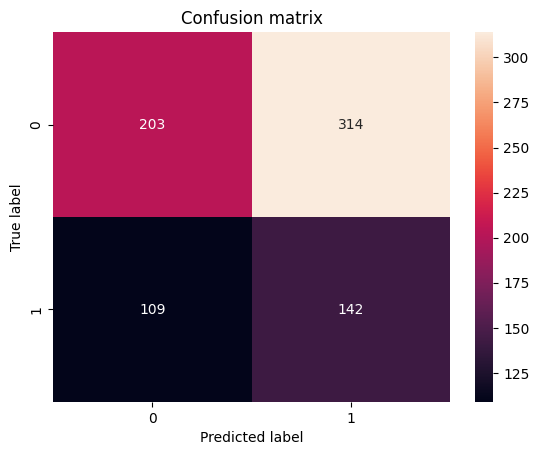

In [18]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 16,
    class_mode = 'binary'

)

test_loss, test_acc = base_model.evaluate(test_generator)
print('test acc:', test_acc)
y_pred = base_model.predict(test_generator)

y_pred = np.round(y_pred)

cm = confusion_matrix(test_generator.classes, y_pred)
cm

test_acc, test_loss = base_model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

#save confusion matrix
plt.savefig('base_model_confusion_matrix.png')


#print classification report

from sklearn.metrics import classification_report
print(classification_report(test_generator.classes, y_pred))


# Pretrained Model

In [12]:

# Load pre-trained VGG16 model without the top layers (include_top=False)
pr_model = VGG16(weights='imagenet', include_top=False, input_shape=(125, 125, 3))

# Freeze the pre-trained layers to prevent them from being updated during training
pr_model.trainable = False

# Create a new model by adding your own classifier on top of the pre-trained base
model = keras.models.Sequential()
model.add(pr_model)
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=1e-3), metrics=['acc'])

# Train the model
history1 = model.fit(
    train_generator,
    steps_per_epoch=32,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=32, callbacks=[early_stopping]
)




2023-06-02 13:45:08.257990: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-02 13:45:08.258042: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/flaviopfister/anaconda3/envs/DeepLearning_2/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30


2023-06-02 13:45:09.483061: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-06-02 13:45:09.841719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - ETA: 0s - loss: 0.4783 - acc: 0.7930

2023-06-02 13:45:37.728843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 56s 2s/step - loss: 0.4783 - acc: 0.7930 - val_loss: 0.3988 - val_acc: 0.7891
Epoch 2/30
32/32 [==============================] - 51s 2s/step - loss: 0.3764 - acc: 0.8438 - val_loss: 0.3180 - val_acc: 0.8750
Epoch 3/30
32/32 [==============================] - 49s 2s/step - loss: 0.3223 - acc: 0.8691 - val_loss: 0.2859 - val_acc: 0.8828
Epoch 4/30
32/32 [==============================] - 49s 2s/step - loss: 0.3453 - acc: 0.8613 - val_loss: 0.2655 - val_acc: 0.8926
Epoch 5/30
32/32 [==============================] - 48s 2s/step - loss: 0.2780 - acc: 0.8984 - val_loss: 0.2622 - val_acc: 0.8984
Epoch 6/30
32/32 [==============================] - 47s 1s/step - loss: 0.2445 - acc: 0.9004 - val_loss: 0.2455 - val_acc: 0.8984
Epoch 7/30
32/32 [==============================] - 47s 1s/step - loss: 0.2921 - acc: 0.8848 - val_loss: 0.2187 - val_acc: 0.9102
Epoch 8/30
32/32 [==============================] - 47s 2s/step - loss: 0.2357 - acc: 0.9219 - val_lo

FileExistsError: [Errno 17] File exists: 'Plots/Pretrained_Model'

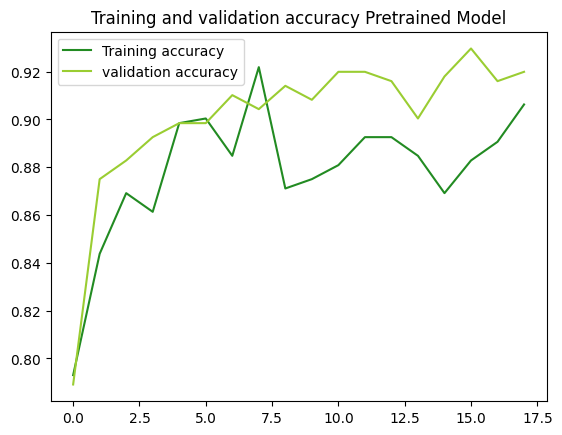

<Figure size 640x480 with 0 Axes>

In [50]:
# Plot of the training and validation Accuracy

acc = history1.history['acc']
val_acc = history1.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy', color='forestgreen')
plt.plot(epochs, val_acc, label='validation accuracy', color='yellowgreen')
plt.title('Training and validation accuracy Pretrained Model')
plt.legend(loc=0)
plt.savefig('Plots/Pretrained_Model/Pretrained_Model_Accuracy.png')
plt.figure()

# create a folder with Plots for the base model
#os.mkdir('Plots')
#os.mkdir('Plots/Pretrained_Model')

In [25]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (125,125),
    batch_size = 768,
    class_mode = 'binary',
    shuffle=False)

test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)

Found 768 images belonging to 2 classes.
1/1 [==============================] - 37s 37s/step - loss: 0.2768 - acc: 0.8854
test acc: 0.8854166865348816


In [26]:
# make predictions
y_pred = model.predict(test_generator)
y_pred = y_pred.round()

1/1 [==============================] - 33s 33s/step


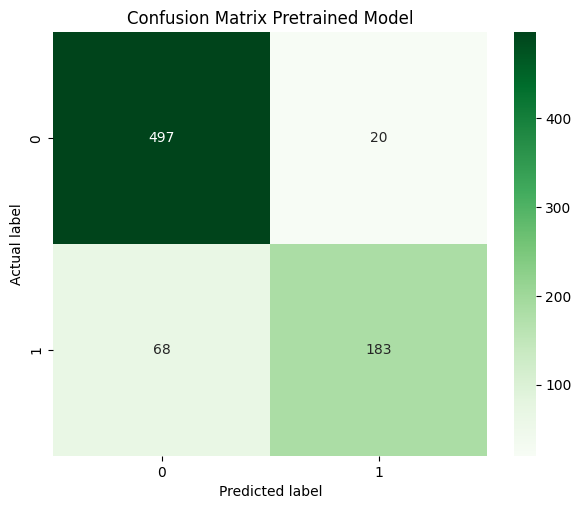

In [51]:
#plot confusion matrix for test data
cm = confusion_matrix(test_generator.classes, y_pred)

# plot the confusion matrix
plt.figure(figsize=(7,5.5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Greens')
plt.title('Confusion Matrix Pretrained Model')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('Plots/Pretrained_Model/Pretrained_Model_Confusion_Matrix.png')
plt.show()

# save confusion matrix
